In [3]:
%matplotlib notebook
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import scale
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn.cluster import Birch

/Users/dtyu/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
#fname = '/Users/Li/Downloads/chx_data/results/fv_ye_q2.npy'
#fname = '/Users/dtyu/NSLS-II-Data/Thursday/10/21/results/fv_ye_q2.npy'
fname = '/Users/dtyu/NSLS-II-Data/Thursday/10/21/results/fv_y_avg.npy'
print 1

1


In [5]:
data = np.load(fname)
data = np.log(data[0::5,:]+1e-6)

#data = np.log(data[:,:]+1e-6)
#data = data[0::5,:]
data.shape

(1755, 1816)

In [6]:
print data[2, 0:100]

[  4.38594152e+00   4.27751765e+00   4.35795752e+00   4.11906450e+00
   4.17448812e+00   4.14286525e+00   4.17873853e+00   4.20645731e+00
   4.18068091e+00   4.23171650e+00   4.45991876e+00   4.42598717e+00
   4.70717017e+00   4.09135178e+00   4.02221984e+00   3.81195938e+00
   3.63648008e+00   3.72367432e+00   3.38458127e+00   3.26827498e+00
   3.15808825e+00   3.16648607e+00   3.00681161e+00   2.86891325e+00
   2.84244811e+00   2.60562850e+00   2.49753890e+00   2.40340426e+00
   2.26203695e+00   2.26504191e+00   2.23743345e+00   2.15995811e+00
   2.01524060e+00   1.92412157e+00   1.89461117e+00   1.80830294e+00
   1.79259124e+00   1.68042030e+00   1.69200975e+00   1.66976654e+00
   1.59067292e+00   1.51955932e+00   1.43959493e+00   1.40480047e+00
   1.37055506e+00   1.29503956e+00   1.28587554e+00   1.24357963e+00
   1.20525388e+00   1.13032876e+00   1.10393882e+00   1.03630029e+00
   9.73118417e-01   9.61337678e-01   8.86845066e-01   8.75251263e-01
   8.74376645e-01   7.96579331e-01

<IPython.core.display.Javascript object>


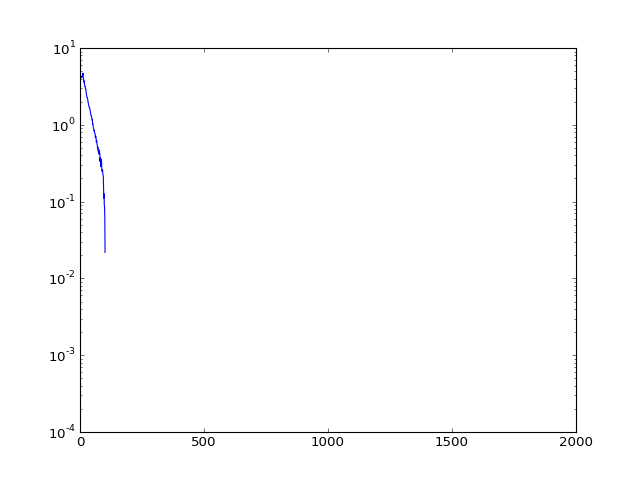

<IPython.core.display.Javascript object>


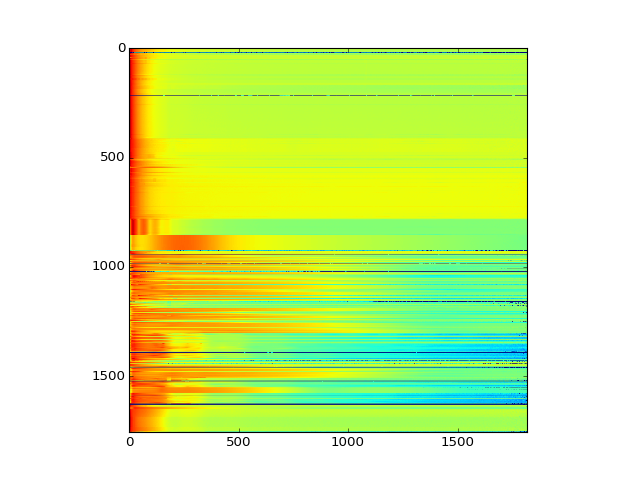

In [5]:
fig, ax = plt.subplots()
ax.semilogy(data[6,:])
plt.show()

fig, ax = plt.subplots()
ax.imshow(data)
plt.show()

In [7]:
np.random.seed(42)

#digits = load_digits()
#data = scale(data)

n_samples, n_features = data.shape
num = 3
#n_digits = len(np.unique(digits.target))
#labels = digits.target

In [8]:
###############################################################################
# Visualize the results on PCA-reduced data

# get low dimension from PCA for plot
reduced_data_pca = PCA(n_components=200).fit_transform(data)

reduced_data_kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10).fit_transform(data)

In [9]:
reduced_data.shape

NameError: name 'reduced_data' is not defined

In [ ]:
print data[2, :], reduced_data[2, 0:19]

In [ ]:
# K means

kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans_out = kmeans.fit_predict(data)
#kmeans_out = kmeans.fit_predict(data)
#kmeans.fit(reduced_data)



kmeans_pca = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans_out_pca = kmeans_pca.fit_predict(reduced_data_kpca)

In [10]:
for i in range(10):
    print np.sum([kmeans_out==i])

print "\n"
for i in range(10):
    print np.sum([kmeans_out_pca==i])

NameError: name 'kmeans_out' is not defined

In [53]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=kmeans_out, marker='s', s=30, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


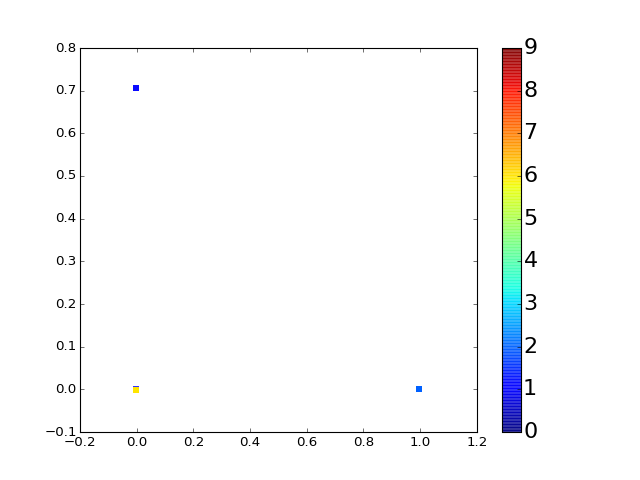

In [54]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=kmeans_out_pca, marker='s', s=30, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()


<IPython.core.display.Javascript object>


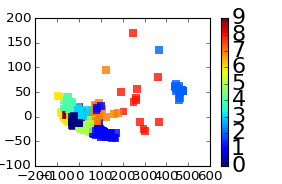

In [14]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 2], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 
plt.legend()

In [15]:
# ye q2
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 2], 
                c=kmeans_out_pca, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

<IPython.core.display.Javascript object>

In [28]:
# DBSCAN

db = DBSCAN(eps=35.0, min_samples=10).fit(data)
db_labels = db.labels_


db_reduced = DBSCAN(eps=35.0, min_samples=10).fit(reduced_data)
db_labels_reduced = db_reduced.labels_

In [33]:
for i in range (10):
    print np.sum([db_labels==i])

1663
13
0
0
0
0
0
0
0
0


In [20]:
print db_labels.shape

(1755,)


In [18]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=db_labels, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

<IPython.core.display.Javascript object>

In [34]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=db_labels_reduced, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


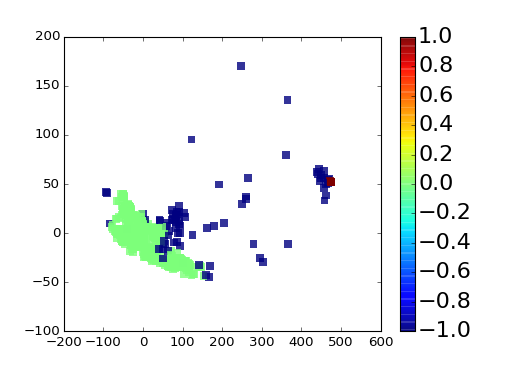

In [21]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 2], 
                c=db_labels, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 



In [22]:
# AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10)
ac_cluster = ac.fit_predict(data)


In [23]:
ac_cluster.shape

(1755,)

<IPython.core.display.Javascript object>


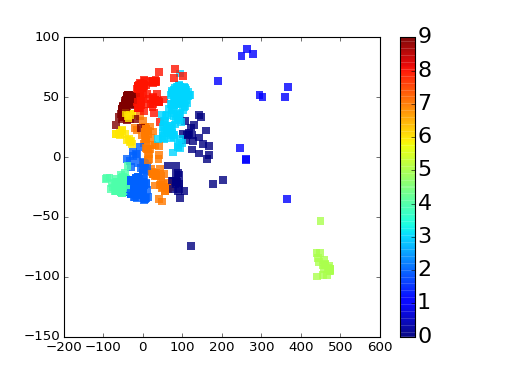

In [24]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=ac_cluster, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

<IPython.core.display.Javascript object>


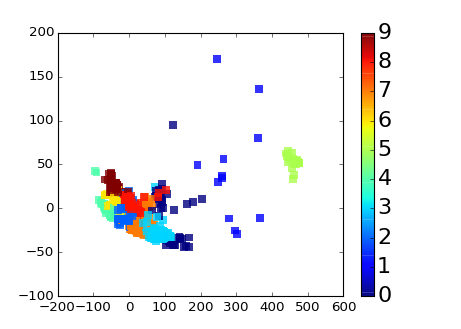

In [25]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 2], 
                c=ac_cluster, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

In [ ]:
# spectrum clustering
#spectral  = SpectralClustering(n_clusters=5)
#sc_labels = spectral.fit_predict(data)

In [26]:
#fig, ax = plt.subplots()

#ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
#           c=sc_labels, marker='s', s=50, alpha=0.8,
#           linewidths=1, linewidth=0)

# colorlist = ['red', 'green', 'blue', 'orange']
# colorlist = ['red', 'green']
# for i in range(len(colorlist)):
#     print(i)
#     color = colorlist[i]
#     pos = np.where(clusters==i)
#     clusterdata = clusters[pos]
#     ax.scatter(reduced_data[:, 0][pos], reduced_data[:, 1][pos], 
#                c=clusterdata, marker='s', s=250, alpha=0.8,
#                linewidths=1, linewidth=0)
#plt.legend()

In [35]:
# gaussian mixture

g = mixture.GMM(n_components=10)
g_clusters = g.fit(data) 

In [36]:
dir(g_clusters)
g_clusters.weights_
g_clusters.means_.shape

(10, 1816)

In [37]:
# BIRCH

brc = Birch(branching_factor=50, n_clusters=None, threshold=0.5, compute_labels=True)
brc_labels = brc.fit_predict(data)

In [38]:
brc_labels

array([ 846,  847,  848, ..., 1585,  489, 1586])

<IPython.core.display.Javascript object>


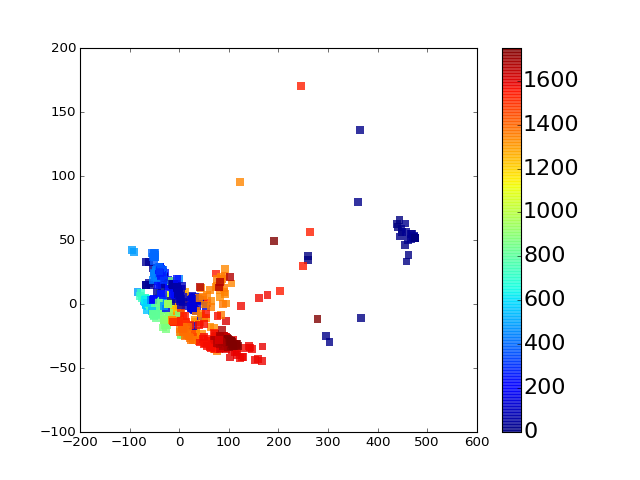

In [39]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 2], 
                c=brc_labels, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

<IPython.core.display.Javascript object>


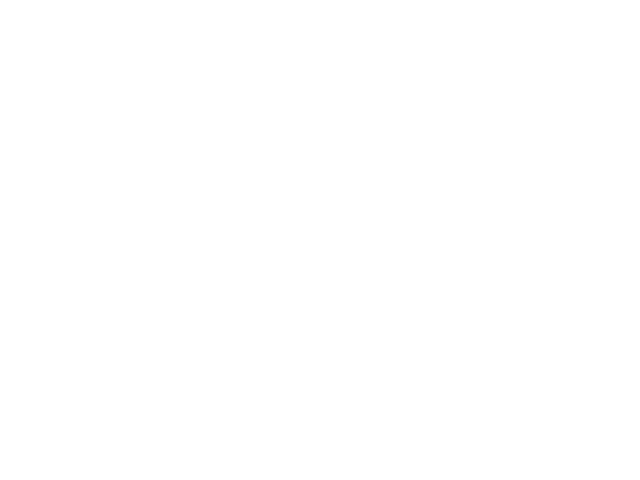

ValueError: Incorrect number of features. Got 2 features, expected 1816

In [40]:
fig, ax = plt.subplots()
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 5.0     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
#z_min, z_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# x_min = -25
# x_max = 100
# y_min = -100
# y_max =25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h))

# # # Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = spectral.fit_predict(np.c_[xx.ravel(), yy.ravel()])
#Z = clusters

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.figure(1)
#ax.clf()
ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()